Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

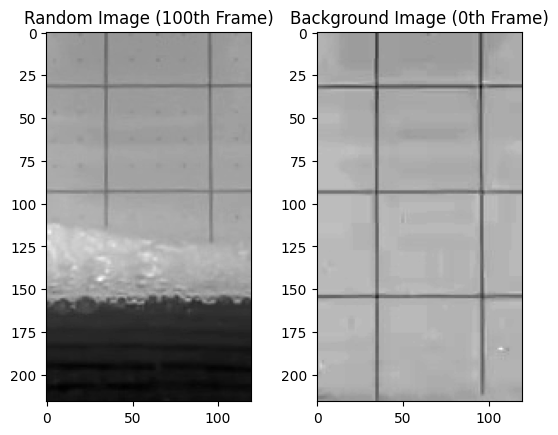

In [3]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Total Area: 25920
Percentage: 26.3 %


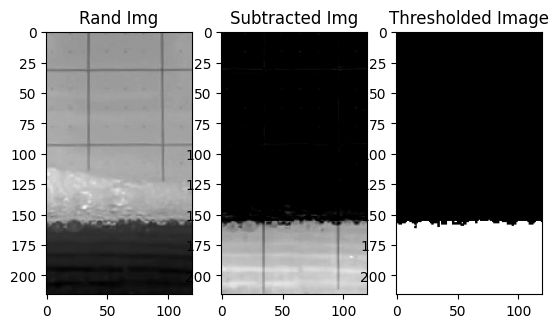

In [4]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

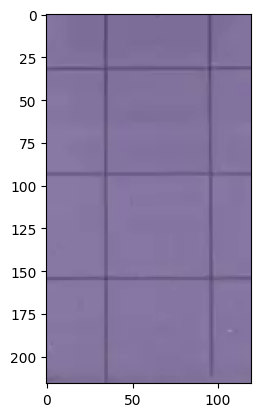

In [6]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame150 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame150)
plt.show()



# Answers

In [ ]:
1.Plot of the liquid level.(ploted using adjustive threshold)

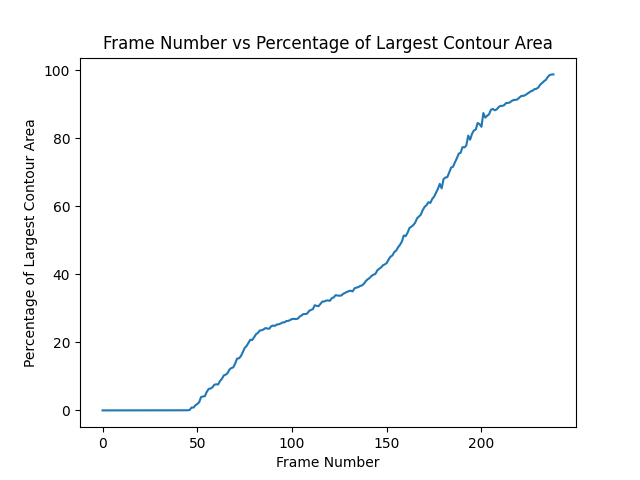

2.A brief note on what the student understood by reading the section on Otsu's threholding method.

Otsu's Binarization is an automatic image thresholding method. It analyzes the image histogram to find the optimal threshold that separates pixels into two classes (foreground and background) by maximizing inter-class variance or minimizing intra-class variance. This is particularly effective for images with bimodal histograms.

How it Works:

Calculate Histogram: The algorithm first calculates the histogram of the grayscale image.
Iterate Thresholds: It then iterates through all possible threshold values.
Calculate Variances: For each threshold value, it calculates the intra-class and inter-class variances.
Optimal Threshold: The optimal threshold value is the one that minimizes the intra-class variance or, equivalently, maximizes the inter-class variance.

3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images

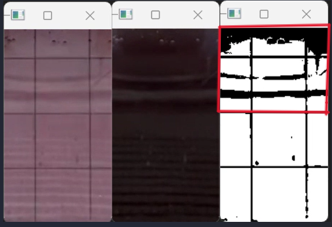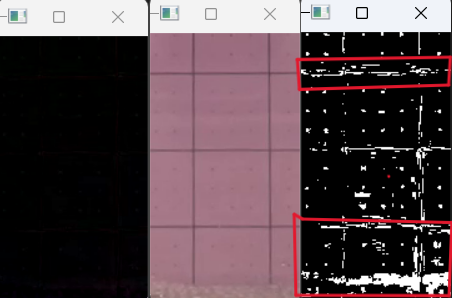

4.  A brief description on the final algorithm developed by the student

The code performs image and video processing using OpenCV, NumPy, and Matplotlib. It starts by loading two grayscale images from file paths, displaying them side by side, and performing image subtraction to highlight differences. Otsu’s thresholding is applied to convert the subtracted image into a binary format. Contours are detected and sorted by area to calculate the largest contour's percentage relative to the image size. This part demonstrates basic image processing tasks like subtraction, thresholding, and contour detection.

The video processing function opens a video file, reads the first frame as the background, and processes subsequent frames by subtracting them from the background. Each subtracted frame is converted to grayscale and thresholded using Otsu’s method. Contours are detected, and the largest contour’s area percentage is calculated and stored. The original, subtracted, and thresholded frames are displayed in real time. The loop runs until the video ends or the 'E' key is pressed. Afterward, a plot showing the largest contour area percentage across frames is generated using Matplotlib. This approach illustrates dynamic frame-by-frame analysis and visualization


def process_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    ret, background = cap.read()
    if not ret:
        print("Error: Unable to read the first frame.")
        cap.release()
        return
    frame_no = 0
    percentages = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Subtract the current frame from the background
        img_sub = cv2.subtract(background, frame)

        # Convert to grayscale
        img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

        # Apply threshold
        #_, img_sub_thresh = cv2.threshold(img_sub_gray, 40, 255, cv2.THRESH_BINARY)

        # Thresholding the image, to obtain binary image
        ret, img_sub_thresh = cv2.threshold(img_sub_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours
        contours, _ = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate the largest contour area percentage
        if contours:
            largest_contour_area = max(cv2.contourArea(c) for c in contours)
            frame_area = frame.shape[0] * frame.shape[1]
            percentage = (largest_contour_area / frame_area) * 100
        else:
            percentage = 0

        percentages.append(percentage)

        # Display the video and processed frames
        cv2.imshow('Original Frame', frame)
        cv2.imshow('Subtracted Frame', img_sub)
        cv2.imshow('Thresholded Frame', img_sub_thresh)

        # Break the loop on pressing 'E'
        if cv2.waitKey(20) & 0xFF == ord('E'):
            break

        frame_no += 1
    cap.release()
    cv2.destroyAllWindows()

    # Plot frame number vs percentage
    plt.plot(range(len(percentages)), percentages)
    plt.xlabel('Frame Number')
    plt.ylabel('Percentage of Largest Contour Area')
    plt.title('Frame Number vs Percentage of Largest Contour Area')
    plt.show()
# Call the function with the video path
video_path = 'C:\\Users\\hasit\\Downloads\\ETM4272-main\\ETM4272-main\\demo2_images\\liquidVideo.mp4'
process_video(video_path)